In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore') 

In [2]:
df= pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.drop(columns=['CustomerID','Genre','Age'],inplace = True)
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [5]:
df.shape

(200, 2)

In [6]:
X = df.iloc[:,:2].values

**Dendrogram

to find optimal number of clusters


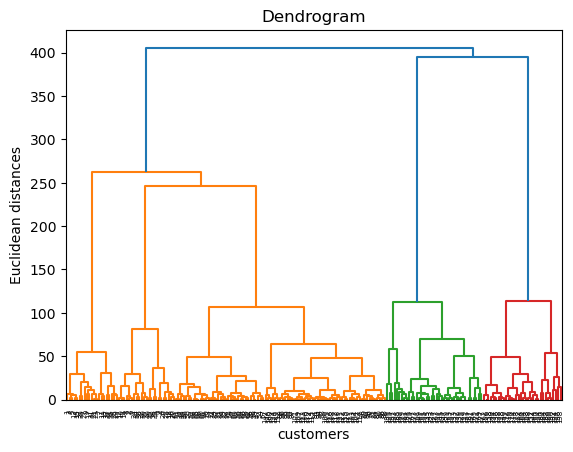

In [7]:
import scipy. cluster.hierarchy as sch
data = sch.linkage(X, method = 'ward')

dendrogram = sch.dendrogram(data)

plt.title('Dendrogram')
plt.xlabel('customers')
plt.ylabel('Euclidean distances')
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5,  linkage = 'ward')

y_hc = hc.fit_predict(X)

In [ ]:
y_hc

In [11]:
df ['Cluster'] = pd.DataFrame(y_hc)
df

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


In [ ]:
**Visualising the clusters
Before Clustering

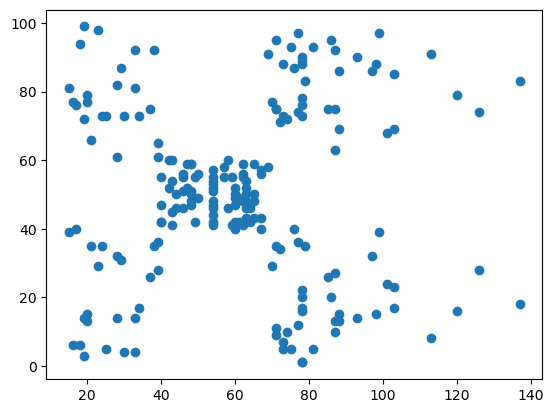

In [12]:
a=df.iloc[:,0]
b=df.iloc[:,1]

plt.scatter(a,b)
plt.show()


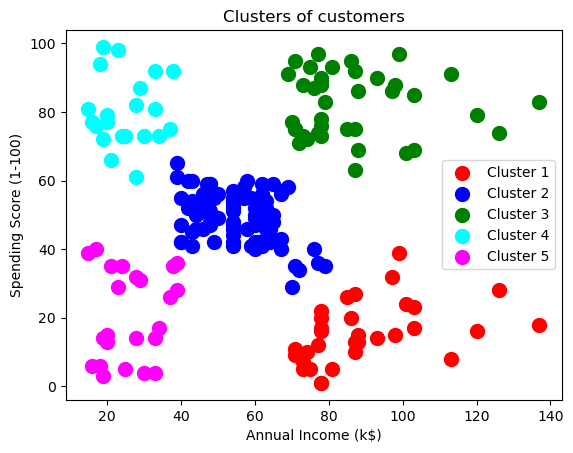

In [13]:
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1],
            s= 100, c ='red',label ='Cluster 1')

plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1],
            s= 100, c ='blue',label ='Cluster 2')


plt.scatter(X[y_hc == 2,0], X[y_hc == 2,1],
            s= 100, c ='green',label ='Cluster 3')


plt.scatter(X[y_hc == 3,0], X[y_hc == 3,1],
            s= 100, c ='cyan',label ='Cluster 4')

plt.scatter(X[y_hc == 4,0], X[y_hc == 4,1],
            s= 100, c ='magenta',label ='Cluster 5')

plt. title('Clusters of customers') 
plt. xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt. legend ()
plt.show()